***Data Preprocessing Steps:-***

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
company=pd.read_csv('/content/drive/My Drive/companies.csv')
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [4]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [6]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information.
    2. Remove noise or unreliable data (missing values and outliers).
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [7]:
#Type your code here!
company.drop(columns=["region","city"],inplace=True)
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [8]:
#Type your code here!
company.drop(columns=["id","Unnamed: 0.1","entity_type","entity_id","parent_id","created_by","created_at","updated_at"],inplace=True)
company.columns

Index(['name', 'normalized_name', 'permalink', 'category_code', 'status',
       'founded_at', 'closed_at', 'domain', 'homepage_url', 'twitter_username',
       'logo_url', 'logo_width', 'logo_height', 'short_description',
       'description', 'overview', 'tag_list', 'country_code', 'state_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'ROI'],
      dtype='object')

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [9]:
#Type your code here!
company.drop(columns=["domain","homepage_url","twitter_username","logo_url","logo_width","logo_height","short_description","description","overview","tag_list","name","normalized_name","permalink","invested_companies"],inplace=True)
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'state_code', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'ROI'],
      dtype='object')

#### 1.d. Delete duplicate values if found any.

In [10]:
# Delete duplicate values if found any.
#Type your code here!
company.duplicated().sum()

np.int64(86929)

In [11]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here!
company.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
196548,False
196549,False
196550,False
196551,False


In [12]:
# Let's delete all the duplicate values
#Type your code here!
company.drop_duplicates(inplace=True)

In [13]:
# check if any left
#Type your code here!
company.duplicated().sum()

np.int64(0)

#### 1.e. Delete those which has more than 98% of null values.

In [14]:
company

,category_code,status,founded_at,closed_at,country_code,state_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,WA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,CA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [15]:
# # Since we can see only nan values so et's check how much of ros has nan values.
#Type your code here!
company.isnull().sum()

,0
category_code,12259
status,0
founded_at,27042
closed_at,107005
country_code,24870
state_code,60325
first_investment_at,107377
last_investment_at,107377
investment_rounds,107373
first_funding_at,78152


In [16]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
#Type your code here!
null_ratio = company.isnull().mean()
null_ratio

,0
category_code,0.111828
status,0.000000
founded_at,0.246680
closed_at,0.976109
country_code,0.226866
state_code,0.550290
first_investment_at,0.979503
last_investment_at,0.979503
investment_rounds,0.979466
first_funding_at,0.712910


In [17]:
cols_to_drop = null_ratio[null_ratio > 0.96].index
company.drop(columns=cols_to_drop, inplace=True)
company.columns

Index(['category_code', 'status', 'founded_at', 'country_code', 'state_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [18]:
#Type your code here!
company.dropna(subset=["status","country_code","category_code","founded_at"],inplace=True)

In [19]:
#Type your code here!
company.isnull().mean()

,0
category_code,0.000000
status,0.000000
founded_at,0.000000
country_code,0.000000
state_code,0.428053
first_funding_at,0.642401
last_funding_at,0.642401
funding_rounds,0.640201
funding_total_usd,0.678273
first_milestone_at,0.445910


In [ ]:
#Type your code here!

In [20]:
# Since we can see only nan values so et's check how much of rows has nan values.
#Type your code here!
company.isnull().sum()

,0
category_code,0
status,0
founded_at,0
country_code,0
state_code,27231
first_funding_at,40867
last_funding_at,40867
funding_rounds,40727
funding_total_usd,43149
first_milestone_at,28367


In [ ]:
#Type your code here!

In [ ]:
company

,category_code,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,WA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,NM,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,CA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,USA,CA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [21]:
#Type your code here!
company_original = company.copy()

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming


#### 2.b.1. Find the IQR

In [22]:
# For funding_total_usd
Q1_usd = company_original['funding_total_usd'].quantile(0.25)
Q3_usd = company_original['funding_total_usd'].quantile(0.75)
IQR_usd = Q3_usd - Q1_usd

# For funding_rounds
Q1_rounds = company_original['funding_rounds'].quantile(0.25)
Q3_rounds = company_original['funding_rounds'].quantile(0.75)
IQR_rounds = Q3_rounds - Q1_rounds



#### 2.b.1. Find the Upper and Lower limit

In [23]:
# For funding_total_usd
lower_usd = Q1_usd - 1.5 * IQR_usd
upper_usd = Q3_usd + 1.5 * IQR_usd

# For funding_rounds
lower_rounds = Q1_rounds - 1.5 * IQR_rounds
upper_rounds = Q3_rounds + 1.5 * IQR_rounds

#### 2.b.1.  Find outliers

In [24]:
# For funding_total_usd
outliers_usd = company[(company_original['funding_total_usd'] < lower_usd) | (company_original['funding_total_usd'] > upper_usd)]

# For funding_rounds
outliers_rounds = company[(company_original['funding_rounds'] < lower_rounds) | (company_original['funding_rounds'] > upper_rounds)]


#### 2.b.1. Drop the outliers

In [26]:
#Type your code here!
# For funding_total_usd
company = company[(company['funding_total_usd'] >= lower_usd) & (company['funding_total_usd'] <= upper_usd)]

# For funding_rounds
company = company[(company['funding_rounds'] >= lower_rounds) & (company['funding_rounds'] <= upper_rounds)]


In [25]:
# For funding_total_usd
company_trimmed_usd = company_original[(company_original['funding_total_usd'] >= lower_usd) & (company_original['funding_total_usd'] <= upper_usd)]

# For funding_rounds
company_trimmed_usd = company_original[(company_original['funding_rounds'] >= lower_rounds) & (company_original['funding_rounds'] <= upper_rounds)]


In [ ]:
company

,category_code,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,USA,CA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
20,cleantech,operating,2003-01-01,USA,TX,2011-03-08,2012-01-26,3.0,10125293.0,2010-01-01,2010-01-01,1.0,6.0,30.267153,-97.743061
26,mobile,operating,2003-11-01,AUS,NaN,2003-11-01,2003-11-01,1.0,250000.0,2007-11-01,2007-11-01,1.0,2.0,-27.469771,153.025124
32,education,operating,2010-10-01,USA,NJ,2011-04-16,2011-04-16,1.0,100000.0,2010-10-01,2010-10-01,1.0,NaN,NaN,NaN
36,medical,operating,2006-01-01,USA,MA,2011-09-06,2012-07-10,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008-05-22,USA,CA,2008-05-18,2008-05-18,1.0,130000.0,2008-08-03,2009-09-01,2.0,3.0,37.774929,-122.419415
196537,social,operating,2011-01-11,CAN,NaN,2011-09-06,2011-09-06,1.0,500000.0,2011-01-11,2011-01-11,1.0,2.0,28.805267,-97.003598
196540,games_video,closed,2006-06-01,USA,CA,2008-03-12,2009-02-01,2.0,1100000.0,2005-11-01,2008-09-10,2.0,4.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,USA,CA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329


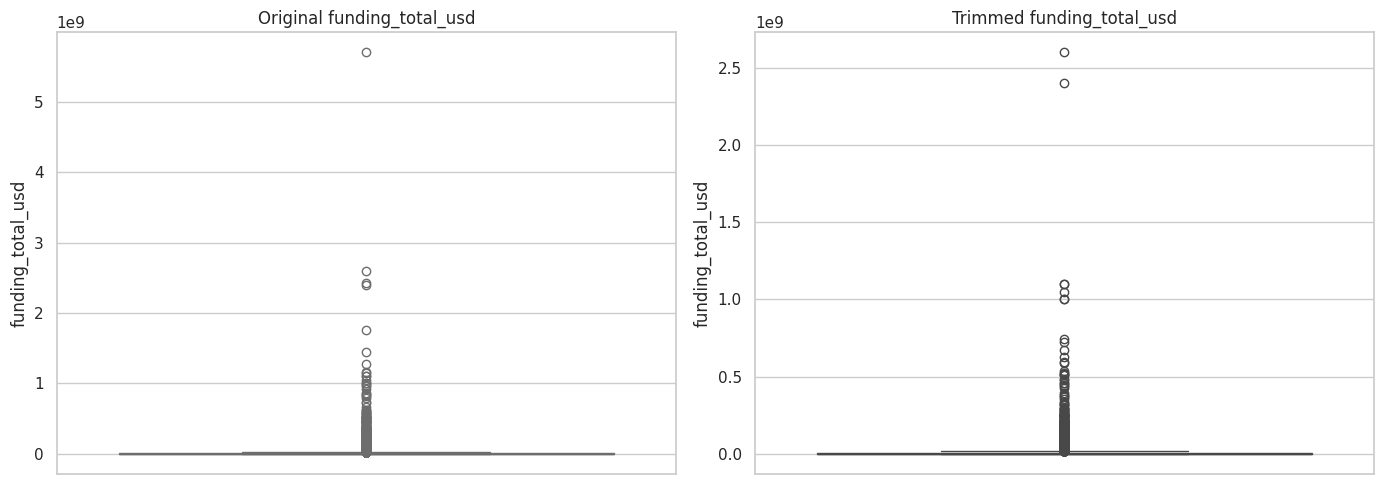

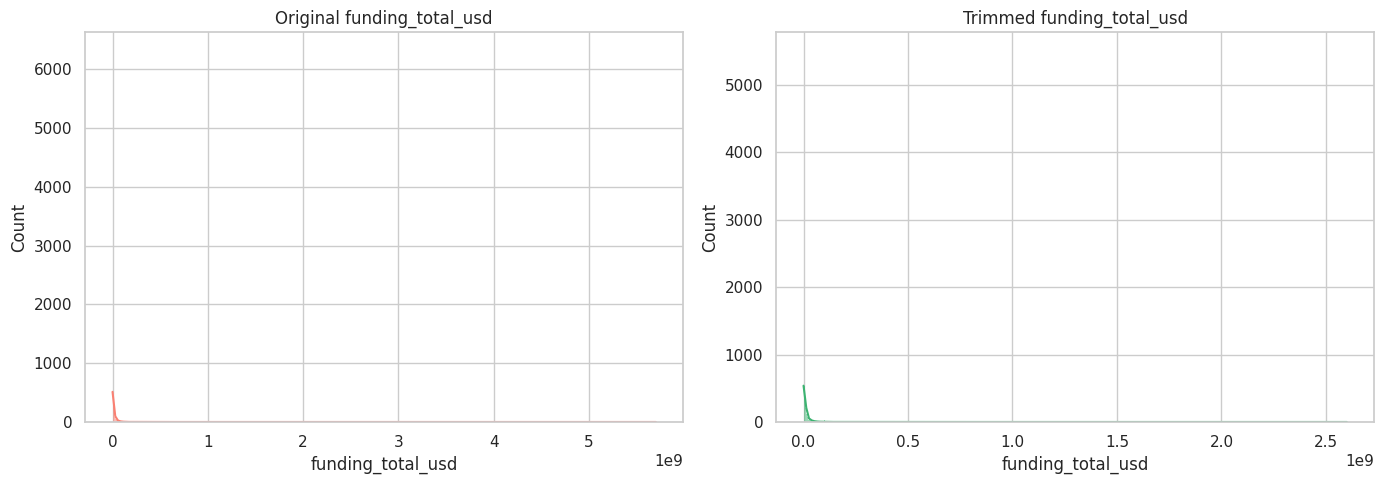

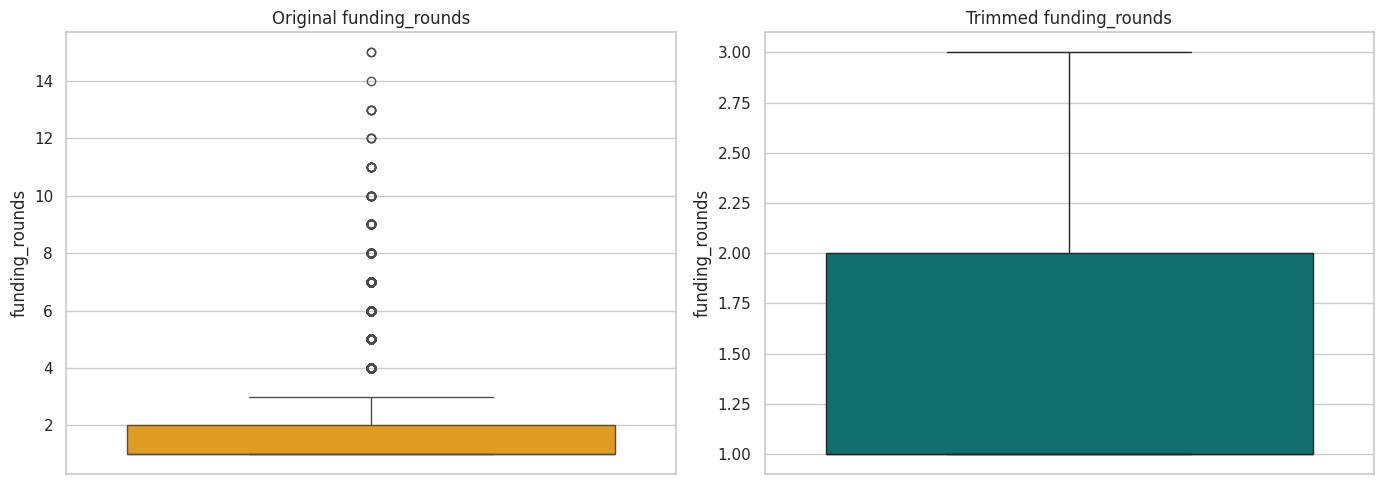

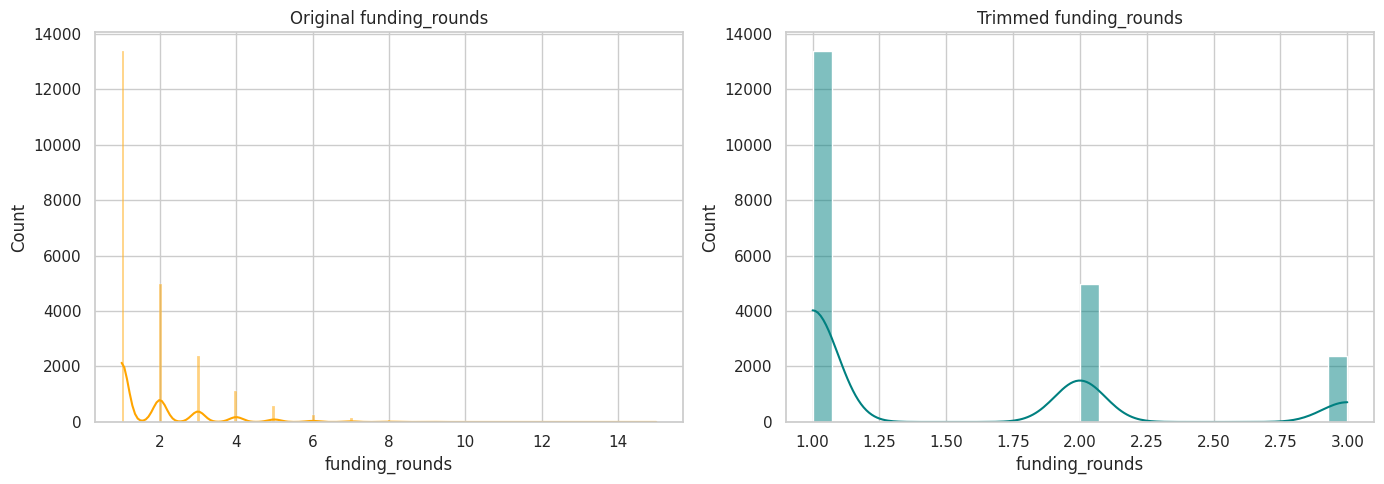

In [27]:
# Compare the plots after trimming
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 5)
# Plot boxplots
plt.subplot(1, 2, 1)
sns.boxplot(y=company_original['funding_total_usd'], color='salmon')
plt.title('Original funding_total_usd')

plt.subplot(1, 2, 2)
sns.boxplot(y=company_trimmed_usd['funding_total_usd'], color='mediumseagreen')
plt.title('Trimmed funding_total_usd')

plt.tight_layout()
plt.show()


# Plot histograms
plt.subplot(1, 2, 1)
sns.histplot(company_original['funding_total_usd'], kde=True, color='salmon')
plt.title('Original funding_total_usd')

plt.subplot(1, 2, 2)
sns.histplot(company_trimmed_usd['funding_total_usd'], kde=True, color='mediumseagreen')
plt.title('Trimmed funding_total_usd')

plt.tight_layout()
plt.show()


### Step 2: Trim funding_rounds
Q1_rounds = company_original['funding_rounds'].quantile(0.25)
Q3_rounds = company_original['funding_rounds'].quantile(0.75)
IQR_rounds = Q3_rounds - Q1_rounds
lower_rounds = Q1_rounds - 1.5 * IQR_rounds
upper_rounds = Q3_rounds + 1.5 * IQR_rounds
company_trimmed_rounds = company_original[
    (company_original['funding_rounds'] >= lower_rounds) &
    (company_original['funding_rounds'] <= upper_rounds)
]

# Boxplots
plt.subplot(1, 2, 1)
sns.boxplot(y=company_original['funding_rounds'], color='orange')
plt.title('Original funding_rounds')

plt.subplot(1, 2, 2)
sns.boxplot(y=company_trimmed_rounds['funding_rounds'], color='teal')
plt.title('Trimmed funding_rounds')

plt.tight_layout()
plt.show()


# Histograms
plt.subplot(1, 2, 1)
sns.histplot(company_original['funding_rounds'], kde=True, color='orange')
plt.title('Original funding_rounds')

plt.subplot(1, 2, 2)
sns.histplot(company_trimmed_rounds['funding_rounds'], kde=True, color='teal')
plt.title('Trimmed funding_rounds')

plt.tight_layout()
plt.show()


#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [28]:
company['status'].value_counts()

,count
status,
operating,14350
acquired,1340
closed,1057
ipo,133


In [29]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# Remove rows where status is 'closed' but closed_at is missing
company = company[~((company['status'] == 'closed') & (company['last_funding_at'].isnull()))]

# Remove rows where status is not 'closed' but closed_at is filled (inconsistent)
company = company[~((company['status'] == 'closed') & (company['last_funding_at'].notnull()))]

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [30]:
# Convert these columns to datetime first (if not already)
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at',
                'first_milestone_at', 'last_milestone_at']

# Convert to datetime
for col in date_columns:
    company[col] = pd.to_datetime(company[col], errors='coerce')

# Extract the year only
for col in date_columns:
    company[col] = company[col].dt.year


company

,category_code,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007,USA,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
20,cleantech,operating,2003,USA,TX,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061
26,mobile,operating,2003,AUS,NaN,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.0,-27.469771,153.025124
32,education,operating,2010,USA,NJ,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,NaN,NaN,NaN
36,medical,operating,2006,USA,MA,2011.0,2012.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196519,enterprise,acquired,2003,USA,CA,2006.0,2006.0,1.0,14500000.0,2006.0,2010.0,3.0,19.0,37.441883,-122.143019
196525,web,operating,2007,BRB,NaN,2008.0,2008.0,1.0,798679.0,2008.0,2008.0,3.0,2.0,13.113222,-59.598809
196537,social,operating,2011,CAN,NaN,2011.0,2011.0,1.0,500000.0,2011.0,2011.0,1.0,2.0,28.805267,-97.003598
196549,public_relations,operating,2007,USA,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,37.338208,-121.886329


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code

In [31]:
# 1. category_code

# Check the value counts of category_code
category_counts = company['category_code'].value_counts()
display(category_counts)

,count
category_code,
software,2795
web,1461
biotech,1378
mobile,1206
enterprise,924
ecommerce,858
advertising,709
games_video,692
hardware,547


In [32]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.

# Get the top 10 categories
top_10_categories = category_counts.nlargest(10).index.tolist()
display(top_10_categories)

['software',
 'web',
 'biotech',
 'mobile',
 'enterprise',
 'ecommerce',
 'advertising',
 'games_video',
 'hardware',
 'analytics']

In [34]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

# Replace categories not in the top 10 with 'other'
company['category_code'] = company['category_code'].apply(lambda x: x if x in top_10_categories else 'other')

In [35]:
# Check the value counts again
display(company['category_code'].value_counts())

,count
category_code,
other,4837
software,2795
web,1461
biotech,1378
mobile,1206
enterprise,924
ecommerce,858
advertising,709
games_video,692


In [37]:
# Let's check if we've more than 15 columns
display(company.shape)

(15823, 15)

In [38]:
# One-hot encoding to category_code
category_dummies = pd.get_dummies(company['category_code'], prefix='category')
display(category_dummies.head())

,category_advertising,category_analytics,category_biotech,category_ecommerce,category_enterprise,category_games_video,category_hardware,category_mobile,category_other,category_software,category_web
13,False,False,False,False,False,False,False,False,False,False,True
20,False,False,False,False,False,False,False,False,True,False,False
26,False,False,False,False,False,False,False,True,False,False,False
32,False,False,False,False,False,False,False,False,True,False,False
36,False,False,False,False,False,False,False,False,True,False,False


In [39]:
# Concatenate category with company dataset
company = pd.concat([company, category_dummies], axis=1)
display(company.head())

,category_code,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,category_analytics,category_biotech,category_ecommerce,category_enterprise,category_games_video,category_hardware,category_mobile,category_other,category_software,category_web
13,web,acquired,2007,USA,CA,2008.0,2008.0,1.0,5000000.0,2008.0,...,False,False,False,False,False,False,False,False,False,True
20,other,operating,2003,USA,TX,2011.0,2012.0,3.0,10125293.0,2010.0,...,False,False,False,False,False,False,False,True,False,False
26,mobile,operating,2003,AUS,NaN,2003.0,2003.0,1.0,250000.0,2007.0,...,False,False,False,False,False,False,True,False,False,False
32,other,operating,2010,USA,NJ,2011.0,2011.0,1.0,100000.0,2010.0,...,False,False,False,False,False,False,False,True,False,False
36,other,operating,2006,USA,MA,2011.0,2012.0,2.0,11300000.0,NaN,...,False,False,False,False,False,False,False,True,False,False


In [40]:
# Since, We've added the encoded category_columns, let's delete original category_code
company.drop(columns=['category_code'], inplace=True)
display(company.columns)

Index(['status', 'founded_at', 'country_code', 'state_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'category_advertising',
       'category_analytics', 'category_biotech', 'category_ecommerce',
       'category_enterprise', 'category_games_video', 'category_hardware',
       'category_mobile', 'category_other', 'category_software',
       'category_web'],
      dtype='object')

### Let's encode 'country' column now.

In [41]:
# 1. country_code
# Check the value counts of country_code
country_counts = company['country_code'].value_counts()
display(country_counts)

,count
country_code,
USA,10766
GBR,939
CAN,537
FRA,387
ISR,291
...,...
GIB,1
TUN,1
CMR,1


In [42]:
# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.

# Get the top 10 countries
top_10_countries = country_counts.nlargest(10).index.tolist()
display(top_10_countries)

['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'IND', 'DEU', 'ESP', 'AUS', 'IRL']

In [43]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

# Replace countries not in the top 10 with 'other'
company['country_code'] = company['country_code'].apply(lambda x: x if x in top_10_countries else 'other')

In [44]:
# Check the value counts again
display(company['country_code'].value_counts())

,count
country_code,
USA,10766
other,1878
GBR,939
CAN,537
FRA,387
ISR,291
DEU,261
IND,261
ESP,225


In [45]:
# Check the shape again
display(company.shape)

(15823, 25)

In [46]:
# One-hot encoding to category_code
country_dummies = pd.get_dummies(company['country_code'], prefix='country')
display(country_dummies.head())

,country_AUS,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other
13,False,False,False,False,False,False,False,False,False,True,False
20,False,False,False,False,False,False,False,False,False,True,False
26,True,False,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False,True,False
36,False,False,False,False,False,False,False,False,False,True,False


In [47]:
# Concatenate category with company dataset
company = pd.concat([company, country_dummies], axis=1)
display(company.head())

,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other
13,acquired,2007,USA,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,...,False,False,False,False,False,False,False,False,True,False
20,operating,2003,USA,TX,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,...,False,False,False,False,False,False,False,False,True,False
26,operating,2003,AUS,NaN,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,...,False,False,False,False,False,False,False,False,False,False
32,operating,2010,USA,NJ,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,...,False,False,False,False,False,False,False,False,True,False
36,operating,2006,USA,MA,2011.0,2012.0,2.0,11300000.0,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False


In [48]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(columns=['country_code'], inplace=True)
display(company.columns)

Index(['status', 'founded_at', 'state_code', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'category_advertising',
       'category_analytics', 'category_biotech', 'category_ecommerce',
       'category_enterprise', 'category_games_video', 'category_hardware',
       'category_mobile', 'category_other', 'category_software',
       'category_web', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IND',
       'country_IRL', 'country_ISR', 'country_USA', 'country_other'],
      dtype='object')

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [49]:
# Create the 'isClosed' feature
company['isClosed'] = company['status'].apply(lambda x: 1 if x in ['operating', 'ipo'] else 0)

In [50]:
# Check the value counts of the new feature
display(company['isClosed'].value_counts())

,count
isClosed,
1,14483
0,1340


In [51]:
# Display the head of the dataframe to see the new column
display(company.head())

,status,founded_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other,isClosed
13,acquired,2007,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,...,False,False,False,False,False,False,False,True,False,0
20,operating,2003,TX,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,...,False,False,False,False,False,False,False,True,False,1
26,operating,2003,NaN,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,...,False,False,False,False,False,False,False,False,False,1
32,operating,2010,NJ,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,...,False,False,False,False,False,False,False,True,False,1
36,operating,2006,MA,2011.0,2012.0,2.0,11300000.0,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,1


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

In [ ]:
#Type your code here!

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [52]:
# Note: The markdown is slightly confusing here as 'closed_at' column was dropped earlier.
# Assuming the intention is to calculate active years based on the status and founded_at
# If status is 'operating' or 'ipo', use the current year (2024) as the end year.
# If status is 'acquired' or 'closed', use the 'last_funding_at' year (as a proxy for closure/acquisition year).

# Let's use a more appropriate method to calculate active years, considering the available data.
# We can calculate the difference between the 'last_funding_at' year and 'founded_at' year.
# For companies with no funding information, we can use the difference between the current year and 'founded_at' year.

current_year = 2024  # Assuming the current year is 2024

# Calculate 'active_years'
company['active_years'] = company.apply(
    lambda row: current_year - row['founded_at'] if pd.isna(row['last_funding_at']) else row['last_funding_at'] - row['founded_at'],
    axis=1
)

In [53]:
# Display the head of the dataframe to see the new column
display(company.head())

,status,founded_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other,isClosed,active_years
13,acquired,2007,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,...,False,False,False,False,False,False,True,False,0,1.0
20,operating,2003,TX,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,...,False,False,False,False,False,False,True,False,1,9.0
26,operating,2003,NaN,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,...,False,False,False,False,False,False,False,False,1,0.0
32,operating,2010,NJ,2011.0,2011.0,1.0,100000.0,2010.0,2010.0,1.0,...,False,False,False,False,False,False,True,False,1,1.0
36,operating,2006,MA,2011.0,2012.0,2.0,11300000.0,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,1,6.0


In [54]:
# Check the descriptive statistics of the new feature
display(company['active_years'].describe())

,active_years
count,15823.000000
mean,4.131201
std,6.403409
min,-13.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,106.000000


##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [ ]:
# We have already calculated 'active_years' in the previous step.
# We can check for contradictory issues, e.g., if active_years is negative.
# This might happen if last_funding_at is earlier than founded_at, which indicates a data issue.

# Check for negative active years
negative_active_years = company[company['active_years'] < 0]
display("Rows with negative active years:", negative_active_years)

# Depending on the number of such rows, we can decide to drop them or investigate further.
# For now, let's assume we'll drop them if there are only a few.
if not negative_active_years.empty:
    company = company[company['active_years'] >= 0]
    print(f"Dropped {len(negative_active_years)} rows with negative active years.")

#### 2.b.iii. Then, delete the closed_at column.

In [ ]:
# The 'closed_at' column was already dropped in a previous step.
# Let's confirm the columns to be sure.
display(company.columns)

### Let's work on target variabe now.

In [ ]:
# The target variable is 'status'. We have already created 'isClosed' from it.
# We can drop the original 'status' column now.
company.drop(columns=['status'], inplace=True)
display(company.columns)

In [ ]:
# Let's check the distribution of the target variable 'isClosed'
display(company['isClosed'].value_counts())

In [ ]:
# Let's check the proportion of the target variable
display(company['isClosed'].value_counts(normalize=True))

In [ ]:
# Display the head of the dataframe to see the changes
display(company.head())

### Remove the null vaues with the mean value in 'Numerical Data'

In [ ]:
# Identify numerical columns
numerical_cols = company.select_dtypes(include=np.number).columns.tolist()
display("Numerical columns:", numerical_cols)

,category_code,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,WA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,NM,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,CA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,USA,CA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [58]:
# Impute missing values in numerical columns with the mean
cols_to_impute = ['first_funding_at','last_funding_at','first_milestone_at','last_milestone_at','milestones','relationships']
for col in cols_to_impute:
    if company[col].isnull().any():
        mean_val = company[col].mean()
        company[col].fillna(mean_val, inplace=True)

In [ ]:
# Check for remaining null values in numerical columns
display(company[numerical_cols].isnull().sum())

,category_code,status,founded_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,WA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,NM,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,CA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,USA,CA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [55]:
# First let's check how much of rows has nan values and drop them.
# Check null values across all columns
display(company.isnull().sum())

,0
status,0
founded_at,0
state_code,5165
first_funding_at,34
last_funding_at,34
funding_rounds,0
funding_total_usd,0
first_milestone_at,6366
last_milestone_at,6366
milestones,6366


In [56]:
# It seems there are still null values in 'state_code', 'lat', and 'lng'.
# Since these are geographical indicators, imputing with mean might not be appropriate.
# Let's check the proportion of nulls in these columns again.
display(company[['state_code', 'lat', 'lng']].isnull().mean())

,0
state_code,0.326424
first_funding_at,0.002149
last_funding_at,0.002149
first_milestone_at,0.402326
last_milestone_at,0.402326
milestones,0.402326
relationships,0.141313
lat,0.026228
lng,0.026228


In [57]:
# 'state_code' has a high proportion of nulls, dropping it might be reasonable depending on the analysis goals.
# 'lat' and 'lng' have a smaller proportion of nulls. We could drop rows with nulls in these columns
# or impute them with a placeholder value if location is not critical for the analysis.
# Given the previous steps focused on dropping rows with crucial missing information,
# let's drop rows where 'lat' or 'lng' are missing.

company.dropna(subset=['lat', 'lng'], inplace=True)

# For 'state_code', let's drop the column as it has a high number of missing values and
# we have already used country_code for location information.
company.drop(columns=['state_code'], inplace=True)
# let's drop 'first_funding_at','last_funding_at','first_milestone_at','last_milestone_at','milestones','relationships'



In [59]:
# Final null check on data
display(company.isnull().sum())

,0
status,0
founded_at,0
first_funding_at,0
last_funding_at,0
funding_rounds,0
funding_total_usd,0
first_milestone_at,0
last_milestone_at,0
milestones,0
relationships,0


In [60]:
#Finally Save cleaned Data
company.to_csv('/content/drive/My Drive/cleaned_company_data.csv', index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


In [61]:
company.columns

Index(['status', 'founded_at', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'category_advertising', 'category_analytics', 'category_biotech',
       'category_ecommerce', 'category_enterprise', 'category_games_video',
       'category_hardware', 'category_mobile', 'category_other',
       'category_software', 'category_web', 'country_AUS', 'country_CAN',
       'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_IND', 'country_IRL', 'country_ISR', 'country_USA',
       'country_other', 'isClosed', 'active_years'],
      dtype='object')

### Let's encode 'country' column now.

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
- if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
- Where as if the value is 'acquired' or 'closed', let's put 0.

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

#### 2.b.iii. Then, delete the closed_at column.

### Let's work on target variabe now.

### Remove the null vaues with the mean value in 'Numerical Data'